In [3]:
import time
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    city = input('Please enter a city name(chicago, new york city, washington): ').lower()
    while city not in CITY_DATA.keys():
        print("Wrong input! Enter a valid city name..")
        city = input('\nPlease enter a city name(chicago, new york city, washington): ').lower()
    
    months = ['january', 'february', 'march', 'april', 'may', 'june','all']
    month = input("Please enter a month to filter with..(january, febuary,... june) othwerwise, enter (all):\n").lower()
    while month not in months:
        print('Wrong input! Enter a valid month..')
        month = input("\nPlease enter a month to filter with..(january, febuary,... june) othwerwise, enter (all):\n").lower()
    
    days = ['sunday', 'monday', 'tuesday', 'wednesday', 'thrusday', 'friday', 'saturday', 'all']
    day = input("Please enter a day of week to filter with..(sunday,monday,...saturday) otherwise, enter (all):\n").lower()
    while day not in days:
        print('Wrong input! Enter a valid day of week..')
        day = input("\nPlease enter a day of week to filter with..(sunday,monday,...saturday) otherwise, enter (all):\n").lower()
      
    # get user input for day of week (all, monday, tuesday, ... sunday)
    
    print('-'*40)
    return city, month, day


def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    df = pd.read_csv(CITY_DATA[city])
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.day_name()

    if month != 'all':  
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1 
        df = df[df['month'] == month]
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]

    return df


def time_stats(df,month,day):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # display the most common month
    popular_month_num = df['month'].mode() [0]
    months = ['january', 'february', 'march', 'april', 'may', 'june']
    popular_month = months [popular_month_num - 1]

    # display the most common day of week
    popular_day = df['day_of_week'].mode()[0]

    # display the most common start hour
    df['hour'] = df['Start Time'].dt.hour
    popular_hour = df['hour'].mode()[0]
    # check if the data is filterd by month then dont show the most common month
    if month == 'all':
        print("the most common month is: {}".format(popular_month))
    if day == 'all':
        print("the most common day is: {}".format(popular_day))
    print("the most common hour is: {}".format(popular_hour))
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)
 

def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()
    
    #' display most commonly used start station
    popular_start = df['Start Station'].mode()[0]
    print("the most common start station is: {}.".format(popular_start))
    # display most commonly used end station
    popular_end = df['End Station'].mode()[0]
    print("the most common end station is: {}.".format(popular_end))
    # display most frequent combination of start station and end station trip
    df['start_end'] = df['Start Station'] + " // " + df['End Station']
    popular_start_end = df['start_end'].mode() [0]
    print("the most frequent combination of start station and end station is: {}.".format(popular_start_end))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # display total travel time
    total_duration = df['Trip Duration'].sum()
    print("the total trip duration is: {} seconds.".format(total_duration))
    # display mean travel time
    mean_duration = df['Trip Duration'].mean()
    print("the average trip duration is: {} seconds.".format(mean_duration))
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def user_stats(df,city):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # Display counts of user types
    user_types = df['User Type'].value_counts()
    print('counts of user types are:\n\n{}.'.format(user_types))

    # Display counts of gender
    if city in ['new york city', 'chicago']:
        gender_counts = df['Gender'].value_counts()
        print ('\ncounts of gender are:\n\n{}.'.format(gender_counts))
    

    # Display earliest, most recent, and most common year of birth
    if city in ['new york city', 'chicago']:
        earliest_year = df['Birth Year'].min()
        most_recent_year = df['Birth Year'].max()
        most_common_year = df['Birth Year'].mode()[0]
        print ("\nearliest year of birth: {}.\nmost recent year of birth: {}.\nmost common year of birth: {}".format(earliest_year, most_recent_year, most_common_year))
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

def raw_data(df):
    """Asks users if they want to see 5 rows of raw data or more, prints 5 rows each time"""
    i = 0
    rawdata = input("do you want to see 5 rows of raw data? (yes/no): ").lower()
    while rawdata not in ['yes','no']:
        print("wrong input!\n")
        rawdata = input("do you want to see 5 rows of raw data? (yes/no): ").lower()
        
    while rawdata == 'yes':
        i += 5
        print(df.head(i))
        rawdata = input("do you want to see 5 more rows? (yes/no): ").lower()
        while rawdata not in ['yes','no']:
            print ('wrong input!')
            rawdata = input("do you want to see 5 more rows? (yes/no): ").lower()
            if rawdata == 'no':
                print ('Thank You')
                break
    if rawdata == 'no':
        print ('Thank You')

def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df,month,day)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df,city)
        raw_data(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n').lower()
        if restart == 'no':
            break
        while restart not in ['yes', 'no']:
            print('wrong input!')
            restart = input('\nWould you like to restart? Enter yes or no.\n').lower()
if __name__ == "__main__":
    main()


Hello! Let's explore some US bikeshare data!
Please enter a city name(chicago, new york city, washington): chicago
Please enter a month to filter with..(january, febuary,... june) othwerwise, enter (all):
all
Please enter a day of week to filter with..(sunday,monday,...saturday) otherwise, enter (all):
all
----------------------------------------

Calculating The Most Frequent Times of Travel...

the most common month is: june
the most common day is: Tuesday
the most common hour is: 17

This took 0.09377717971801758 seconds.
----------------------------------------

Calculating The Most Popular Stations and Trip...

the most common start station is: Streeter Dr & Grand Ave.
the most common end station is: Streeter Dr & Grand Ave.
the most frequent combination of start station and end station is: Lake Shore Dr & Monroe St // Streeter Dr & Grand Ave.

This took 0.2884650230407715 seconds.
----------------------------------------

Calculating Trip Duration...

the total trip duration is: 

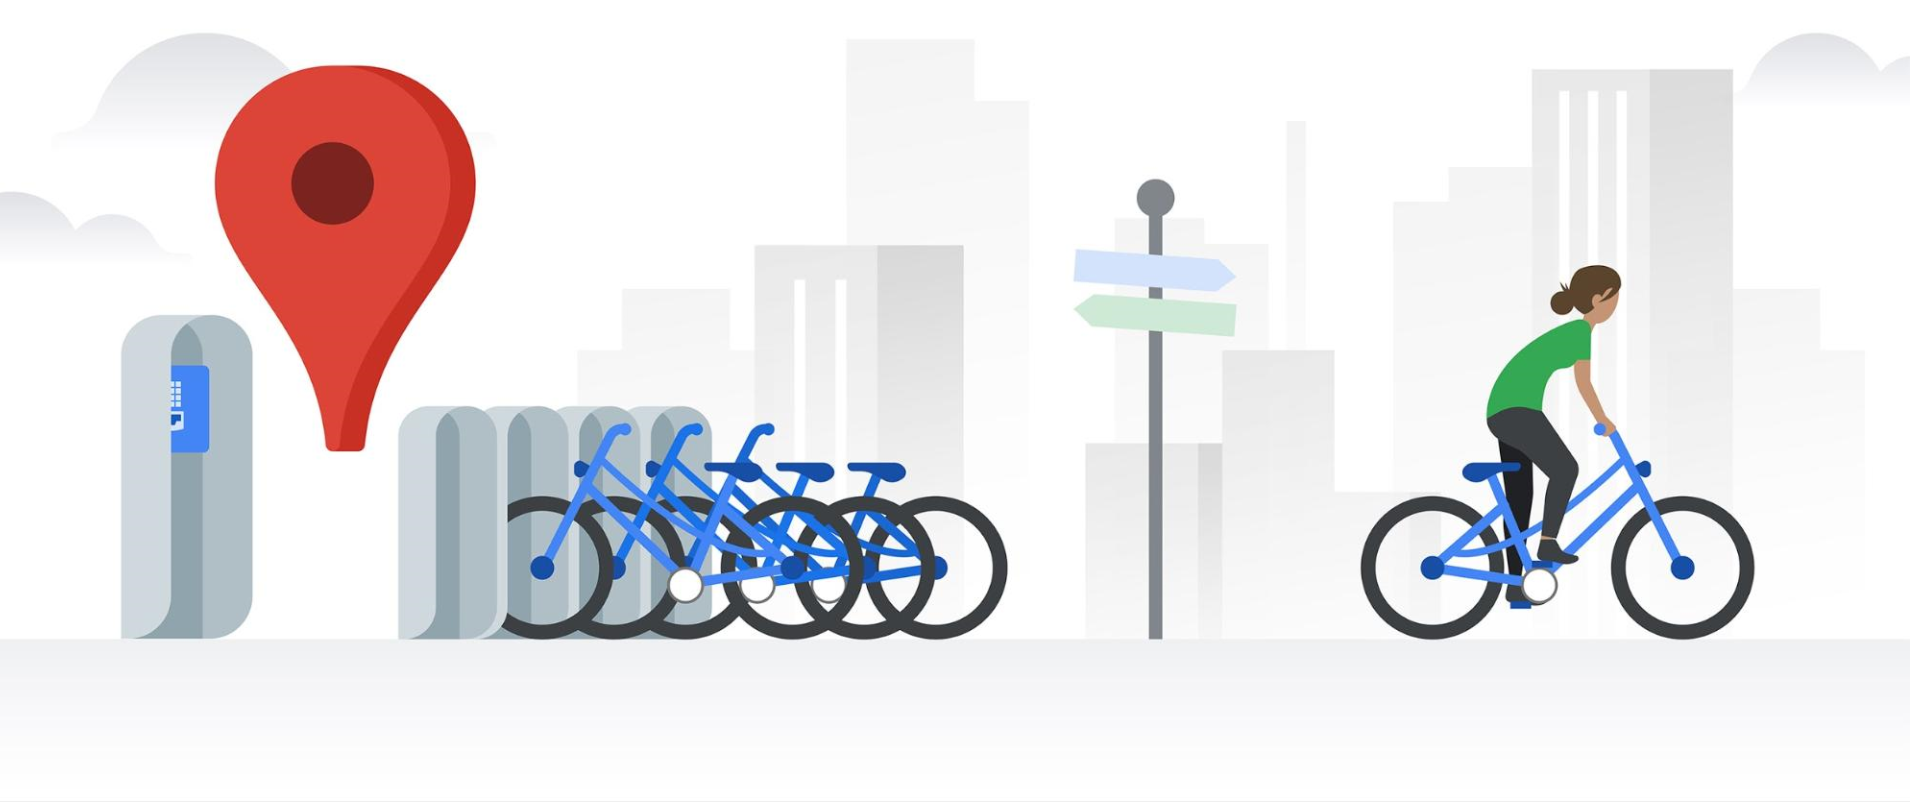